## IMHOTEP: Detrend a single member simulation, applied on different member of an ensemble experiment 
Notebook to:
1. Load data of a simulation and detrend it
2. Plot data before/after detrending at a single point
3. Plot the map of the trend
4. Save the trend in a netcdf file for later use.
5. Same but in loops, to do that on each members of a simulation

#### Import modules

In [1]:
# standard libraries

import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


### **1. Load data of a simulation and detrend it** 

#### Namelist

In [3]:
prefix = "eORCA025.L75-IMHOTEP"
nexp = "EGAI.001"

# variable name of runoffs
varnarnf = 'sornf'

# variable name of SSS
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# path for data (experiments)
diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/jan2023/1y/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"

# full file names
sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf")

# ======== RUNOFFS
# file list
rnffiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")

#### Check which files we are looking at:

In [4]:
sssfiles

'/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI.001*gridTsurf.nc'

In [5]:
print("======")
print('--- LOAD and PROCESS DATA over time period:')

# Prepare data loading (load 2 experiments)
DAT = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri)

# Load and process (load data from the experiments and detrend)
DAT.loaddata()
DAT.detrend()

# print some infos
print(DAT.data.time_counter.isel(time_counter=0).values)
print(DAT.data.time_counter.isel(time_counter=-1).values)
print("NT= "+str(DAT.data.time_counter.size))

--- LOAD and PROCESS DATA over time period:
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39


Now  the data has been loaded. The data before detrending is stored in `DAT.data` and the trend of the data  is stored in `DAT.atr`.

#### Check where we are looking at (single point)

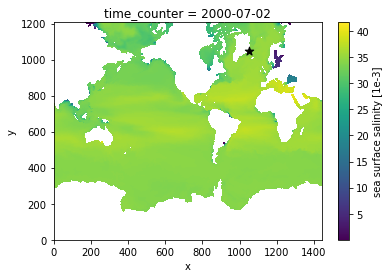

In [6]:
# exp 1
# lets select those indices (x,y)
ijgp = [1050,1050]

# quick plot as a check
DAT.data.isel(time_counter=20).plot()

# add star at point location:
plt.scatter(ijgp[0], ijgp[1], s=80, marker='*',color='k')


### **2. Plot data before/after detrending at a single pointing**
(example in one single point)

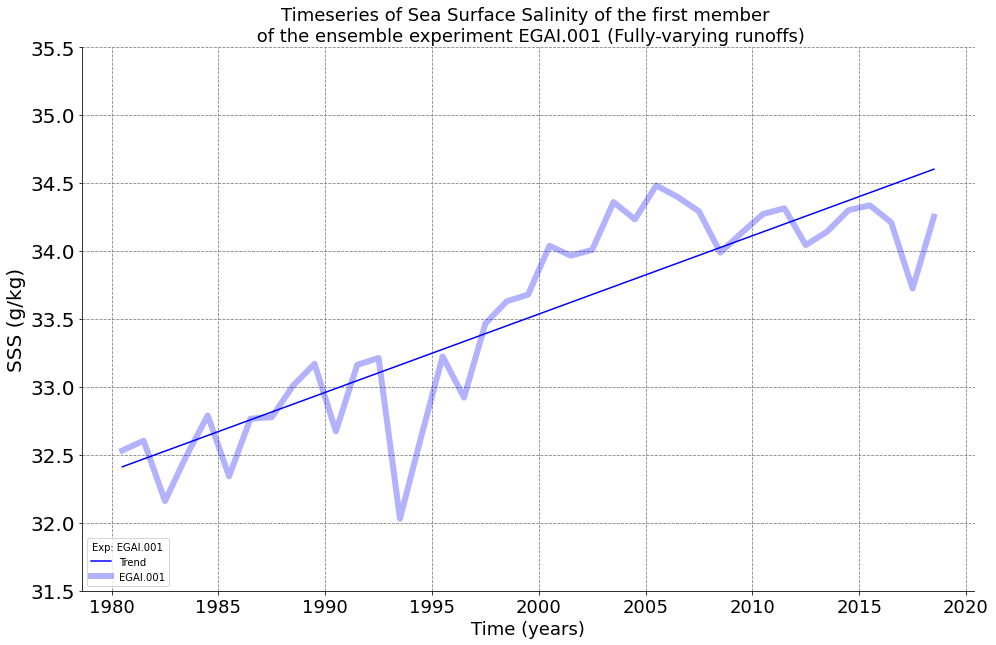

In [10]:
# select data at one example gridpoint

# exp 1
sssGAI    = DAT.data.isel(x=1050,y=1050)
sssGAI_tr = DAT.data.isel(x=1050,y=1050)-DAT.data_dt.isel(x=1050,y=1050)

# plot figure
fig3 = plt.figure(figsize=([16,10]),facecolor='white')

# plot of the data: SSS timeseries before detrending
sssGAI.plot(linewidth=6,color='b',alpha=0.3,label=nexp)

# plot of the data: SSS after detrending
sssGAI_tr.plot(color='b',label= 'Trend' )

# now customize plot
ax = plt.gca()    

# plot grid
ax.grid(which='both', color='grey', linestyle='--')

# Choose which  lines of the plot frame will appear. 
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(True)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# axis label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=20)

# decide if axis ticks are inside or outside plot frame
ax.get_yaxis().set_tick_params(direction='out')
ax.get_xaxis().set_tick_params(direction='out')

# rotate ticks with an angle
plt.xticks(rotation=0, ha='center',va="top")

# axis labels
plt.xlabel("Time (years)")
plt.ylabel("SSS (g/kg)")

# add legend and choose where it will appear
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Exp: '+nexp, loc='lower left')

# set the limits of the plot on y axis
plt.ylim(31.5,35.5)

# plot title
plt.title('Timeseries of Sea Surface Salinity of the first member \n of the ensemble experiment '+nexp+' (Fully-varying runoffs)',fontsize=18, loc='center')

# display plot in notebook window
plt.show()

#--------------------
# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

### **3. Plot trend map**
(stored in DAT.atr)

* load some grid info you need to plot maps

In [6]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

* The trend of the data loaded in the variable `DAT` is stored in `DAT.atr` (recall aslo that the data itself, before detrending is stored in `DAT.data`)

In [7]:
# We want to plot the trend:
data2plot = DAT.atr

# mask data to plot for land missing values
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

* quick initialisation of some plot parameters for maps and colors

In [8]:
# first define some  default color parameters and grid parameters 
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-0.03,0.031,0.001]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.3f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

* PLOT 

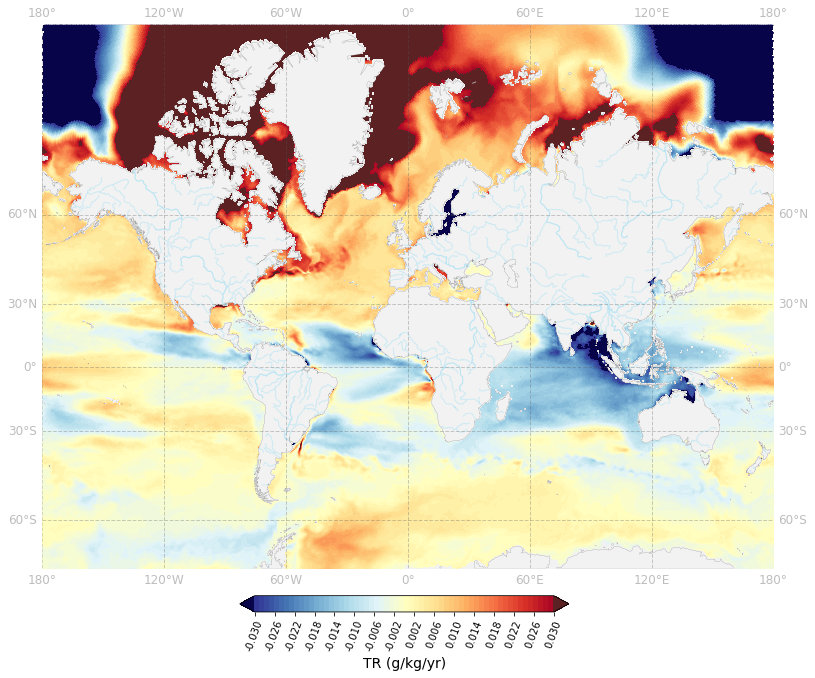

In [21]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD COLORBAR

tlabel=('TR (g/kg/yr)')
cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

### **4. SAVE TREND in a file for later use:**

In [29]:
DAT.saveTR(trno=1,diro=dirdat)

Now if you look in the dirdat directory on jean zay you'll see that a file has been created:

In [31]:
ls  $dirdat

JZ_SSHdtSTD_1y_GAI_1980-2018.nc  JZ_SSSdtSTD_1y_GAI_1997-2007.nc
JZ_SSHdtSTD_1y_S_1980-2018.nc    JZ_SSSdtSTD_1y_GAI_2009-2018.nc
JZ_SSSdtSTD_1m_GAI_2010-2018.nc  JZ_SSSdtSTD_1y_GAI_2010-2018.nc
JZ_SSSdtSTD_1m_S_2010-2018.nc    JZ_SSSdtSTD_1y_GAIa_1997-2007.nc
JZ_SSSdtSTD_1y_AI_1980-2018.nc   JZ_SSSdtSTD_1y_GI_1980-2018.nc
JZ_SSSdtSTD_1y_AI_1997-2007.nc   JZ_SSSdtSTD_1y_GI_2010-2018.nc
JZ_SSSdtSTD_1y_AI_2009-2018.nc   JZ_SSSdtSTD_1y_S_1980-2018.nc
JZ_SSSdtSTD_1y_AI_2010-2018.nc   JZ_SSSdtSTD_1y_S_1997-2007.nc
JZ_SSSdtSTD_1y_GA_1980-2018.nc   JZ_SSSdtSTD_1y_S_2009-2018.nc
JZ_SSSdtSTD_1y_GA_2009-2018.nc   JZ_SSSdtSTD_1y_S_2010-2018.nc
JZ_SSSdtSTD_1y_GA_2010-2018.nc   PROD/
JZ_SSSdtSTD_1y_GAI_1980-2018.nc  TR_EGAI.001_1980-2018.nc


### **5. Same but in loops to do on each member of a simulation**

#### Namelist

In [2]:
# ES: this is experiment ES (ensemble simulation) 
prefixexp = "ES"

prefix = "eORCA025.L75-IMHOTEP"

# variable name of runoffs
varnarnf = 'sornf'

# variable name of SSS
varnasss = 'sosaline'


# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

NE=10

# file type
fileType = "gridTsurf"

# path for data (experiments)
#diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/TREND_ncfiles/1y/"+prefixexp+"/"

# data output directory
dirdat="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/TREND_ncfiles/1y/"+prefixexp+"/"


#### Check files we are looking at

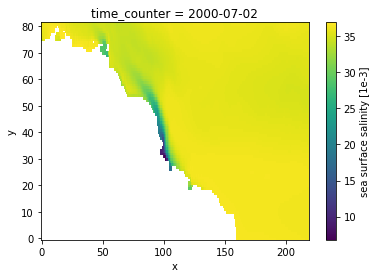

In [3]:
# x and y indices you want to select the region over.
sssdata= li.Floadmultimb(NE,prefixexp,prefix,varnasss,fo,fileType,y1,y2,xselect=[850,1069],yselect=[654,736],verbose=False)

# quick plot as a check 
sssdata.isel(e=0,time_counter=20).plot()


#### Load and process data (SSS) for each member of the experiment

Now the data can be loaded using `li.Ffindinputfiles` and `li.imhov`. The data before detrending is stored in `DAT.data` and the trend of the data  is stored in `DAT.atr`. The trend is then saved in a file for later use.

In [4]:
#We do a loop so each member of the experiement (from 1 to 10) can be: selected, loaded, detrended then saved in a dedicated nc file
for i in range(NE):
    
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1)  
    else:
        nexp = prefixexp+".00"+str(i+1)
    print(nexp)
    
    # path for data (experiments)
    diridat = li.Ffindinputdata(nexp,prefix=prefix,fo=fo)
    
    # We find the file corresponding to the member nexp of the experiment
    sssfiles = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="gridTsurf") 
    print(sssfiles)
    
    # We select the file to prepare the data loading
    DAT = li.imhov(sssfiles, varnasss,nexp,fo,y1,y2,dirigrid=diri) 
    
    # Here the data is loaded, we can now use DAT.data to have access to the DataArray containing the SSS (data before detrending)
    DAT.loaddata() 
    
    # Here the data is detrended, we can now use DAT.atr to have access to the DataArray containing the trend of the data
    DAT.detrend() 
    
    # print some infos
    print(DAT.data.time_counter.isel(time_counter=0).values)
    print(DAT.data.time_counter.isel(time_counter=-1).values)
    print("NT= "+str(DAT.data.time_counter.size))
    
    # SAVE TREND in a file for later use:
    #DAT.saveTR(trno=1,diro=dirdat)

ES.001
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.001-S/1y/????/eORCA025.L75-IMHOTEP.ES.001*gridTsurf.nc
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39
ES.002
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.002-S/1y/????/eORCA025.L75-IMHOTEP.ES.002*gridTsurf.nc
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39
ES.003
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.003-S/1y/????/eORCA025.L75-IMHOTEP.ES.003*gridTsurf.nc
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39
ES.004
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.004-S/1y/????/eORCA025.L75-IMHOTEP.ES.004*gridTsurf.nc
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39
ES.005
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.ES.005-S/1y/????/eORCA025.L75-IMHOTEP.ES.005*gridTsurf.nc
1980-07-02T00:00:00.000000000
2018-07-02T12:00:00.000000000
NT= 39
ES.006
/gpfsstore/rech/cli/rcl

#### Plot trend map
(stored in DAT.atr)

ES.001


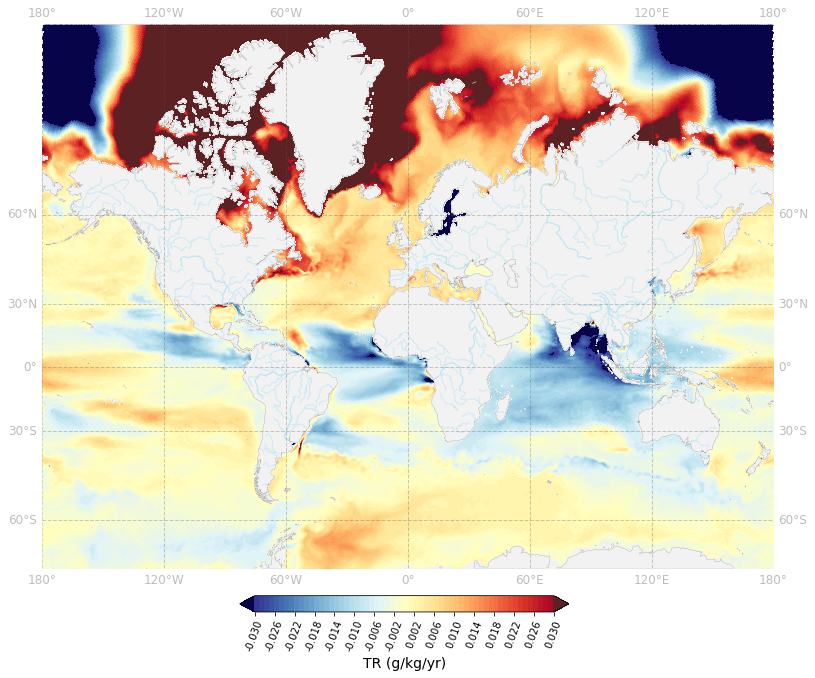

ES.002


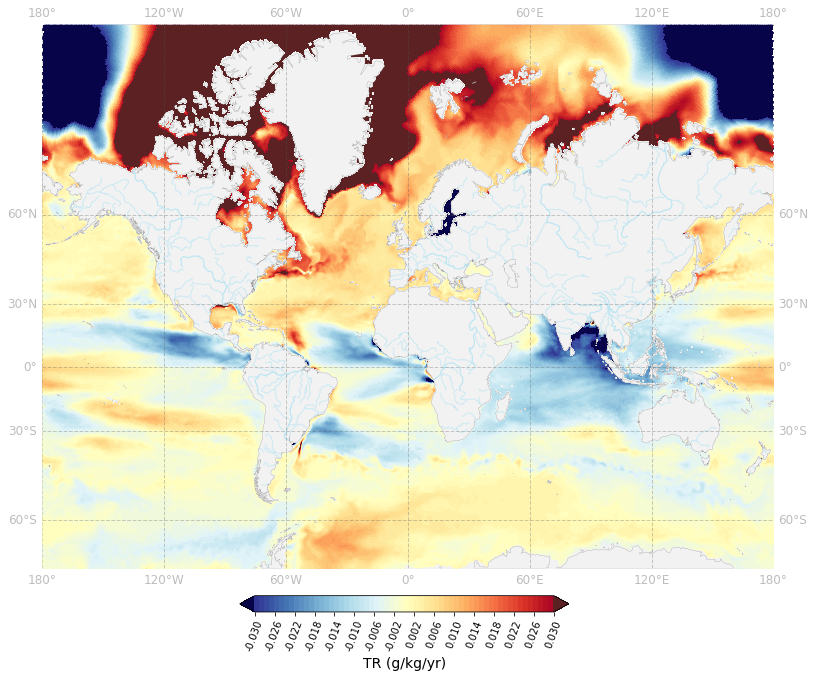

ES.003


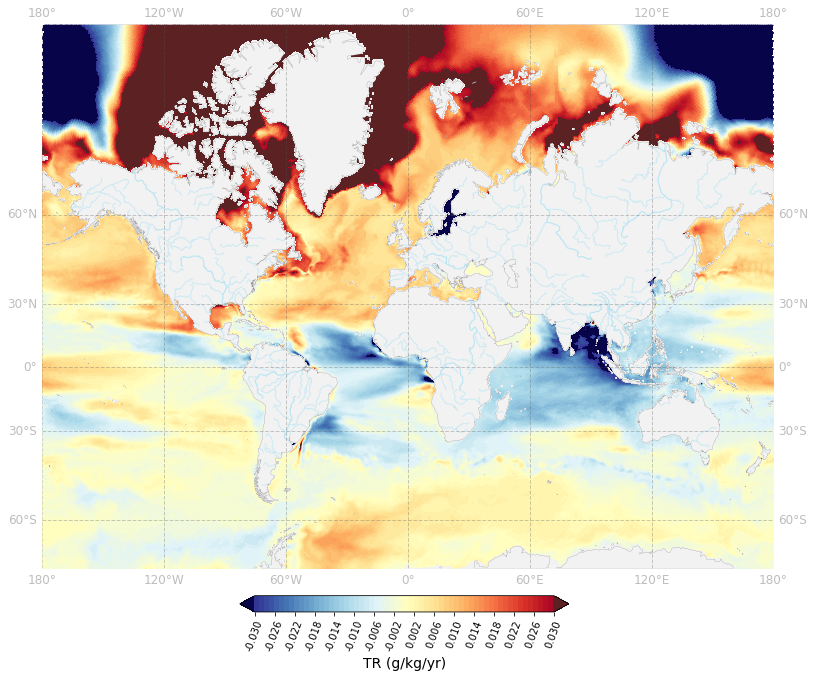

ES.004


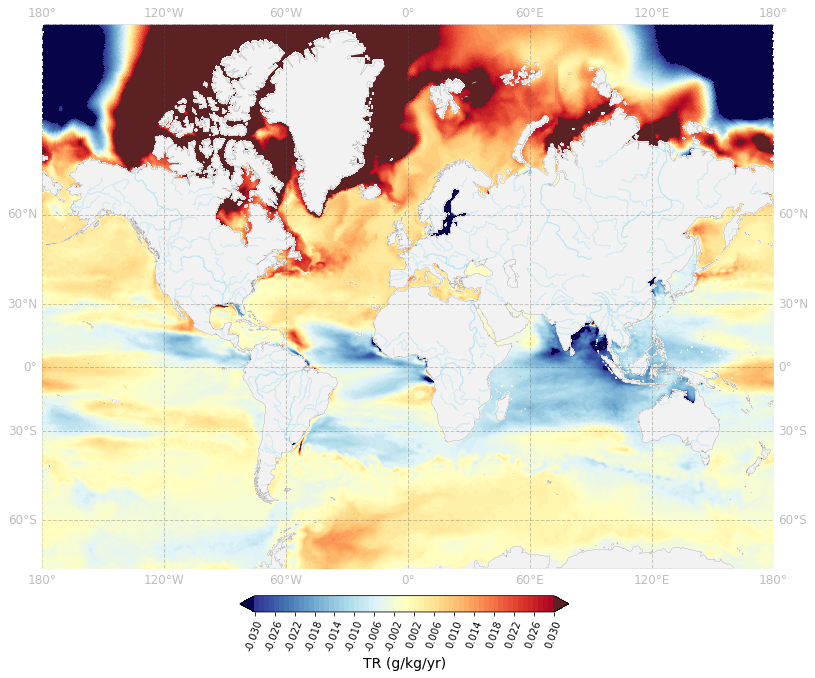

ES.005


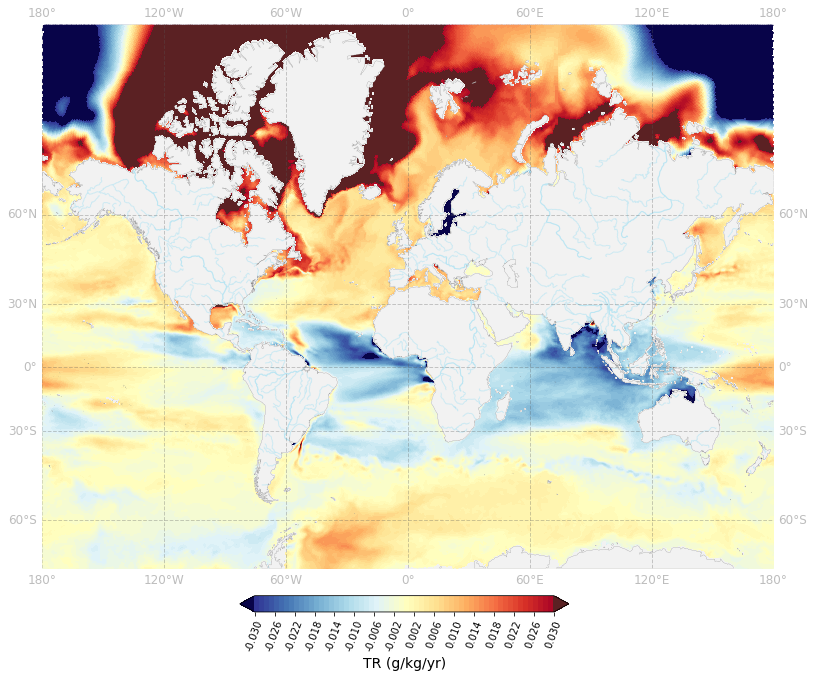

ES.006


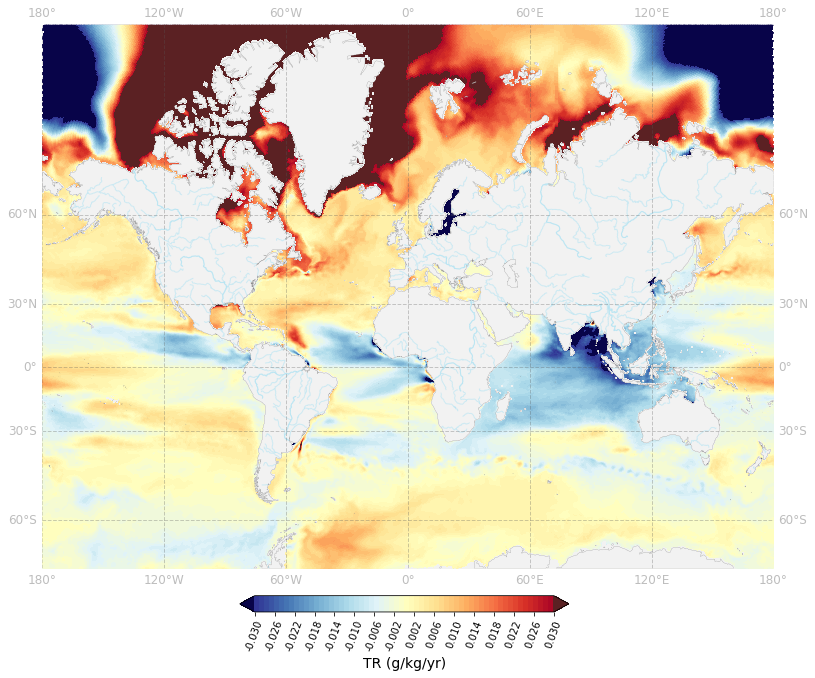

ES.007


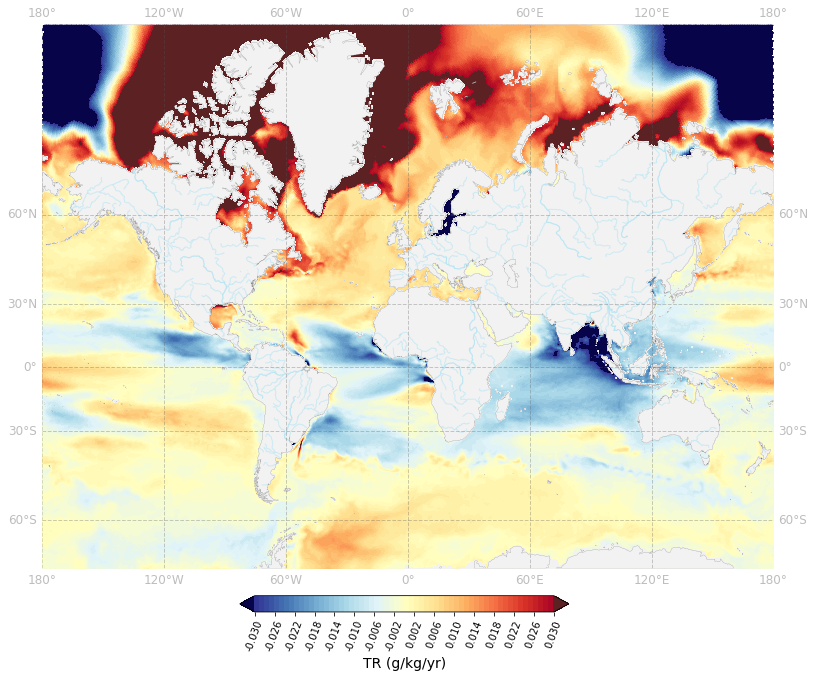

ES.008


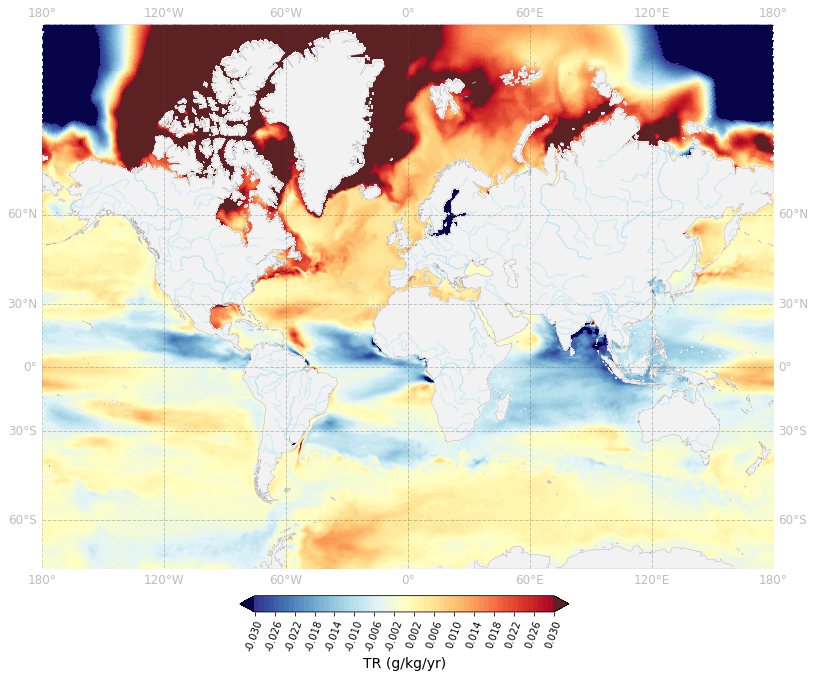

ES.009


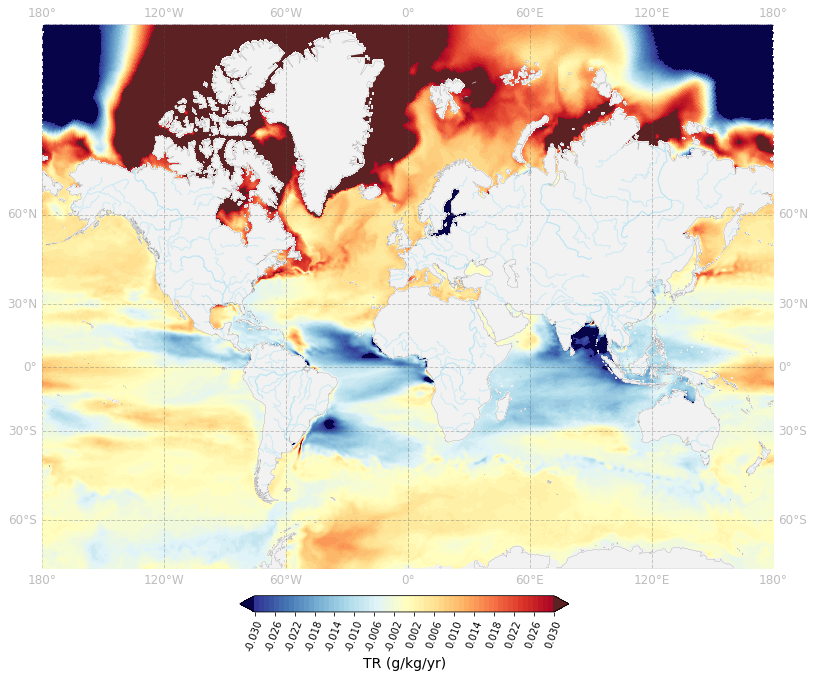

ES.010


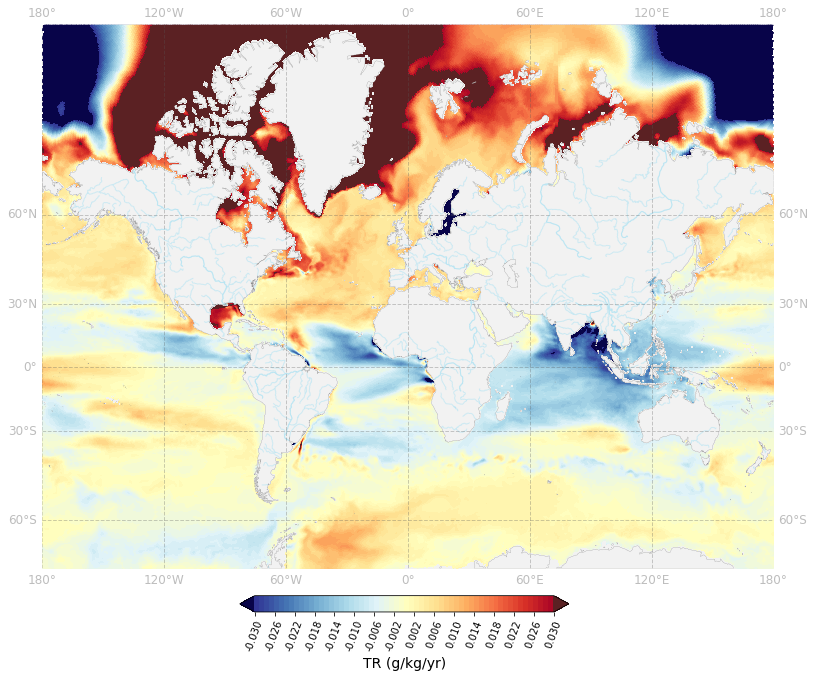

In [9]:
#We do a loop so each trend of the member of the experiement (from 1 to 10) can be: selected from a saved netcdf file, and plotted, then the plot is savedin the same directory
for i in range(NE):
    
    # nexp is modified as function of the number of the experiment (1,2,..,10) 
    if (i+1==10):
        nexp = prefixexp+".0"+str(i+1) 
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    else:
        nexp = prefixexp+".00"+str(i+1)
        filo="TR_"+nexp+"_1980-2018.nc"
        namo="TR2plt_"+nexp+"_1980-2018.nc"
    print(nexp)
    
    # open netcdf file (Dataset) cointaining the trend of data
    DATdataset = xr.open_dataset(diro+filo,decode_times=True)
    
    # convert Dataset to array
    DATtr = DATdataset.to_array(dim ='sosaline',name=None )
    
    # We want to plot the trend:
    data2plot = DATtr

    # mask data to plot for land missing values
    data2plot  = data2plot.where(mask!=0).squeeze()  
    m2plt      = mask.where(mask==0)
    
    #========= CREATE FIGURE
    fig3 = plt.figure(figsize=([18,10]),facecolor='white')

    #========= CREATE COLORMAP
    cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

    #========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
    trdata  = ccrs.PlateCarree() 

    #========= DEAL WITH PROJECTION FOR GLOBAL MAPS
    ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

    #========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
    cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


    #========= GREY SHADING ON CONTINENTS
    
    # add grey shading  where ocean mask is 0 (land gridpoints in the model)
    # rgb color for model land grid points
    r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
    
    # color for continents from data based (hi-res)
    onecohrml=pltcolparam['onecohrml']
    alphaland=pltcolparam['alphaland']
    
    # add on plot
    csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


    #========= ADD GEOGRAPHICAL FEATURES
    # make plot nice with rivers, continents, grids:
    ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

    #========= ADD COLORBAR

    tlabel=('TR (g/kg/yr)')
    cb = li.Faddcolorbar(fig3,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                             tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                            bbta=(-0.18,-0.25,0.9,0.2))  

    #========= FREMOVE FRAME 
    li.Fnospines(ax)

    plt.show()
    
    # Save fig in png, resolution dpi    
    #li.Fsaveplt(fig3,diro,namo,dpifig=300)